The provided dataset has the following 3 files:

TRAIN.csv (contains training data)
TEST.csv (test data for prediction)
sample_submission.csv (an example of submission file)
The TRAIN.csv has 31 attributes, 30 training, and 1 target attribute (Class). "0" represents non-fraudulent transactions and "1" represents fraudulent transactions. Attributes V1...V28 are anonymous so that the internal details may be kept hidden.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')   

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
test=pd.read_csv("/content/gdrive/My Drive/SKILLATHON (DATA SCIENCE)/data/Files/TEST.csv")

In [ ]:
train=pd.read_csv("/content/gdrive/My Drive/SKILLATHON (DATA SCIENCE)/data/Files/TRAIN.csv")

In [ ]:
print(train.shape)
print(test.shape)

(284455, 31)
(352, 30)


In [ ]:
train.sample(5)

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
257670,257670,1.224835,-0.037281,0.017302,0.125514,-0.524171,-1.348691,0.258546,-0.234622,0.177806,-0.105177,-0.433127,-0.606370,-1.618143,0.761785,1.036543,0.200195,-0.107705,-0.799147,0.280017,-0.101769,-0.439714,-1.487476,0.193785,0.344609,0.030667,0.624331,-0.119035,0.006797,45.88,0
181816,181816,2.020068,0.081378,-1.612611,0.349584,0.341030,-0.675001,0.053835,-0.074685,0.292413,-0.195482,1.218598,0.648218,-0.521215,-0.543634,-0.457699,0.480049,0.317554,0.183814,0.275203,-0.182500,-0.306454,-0.835603,0.356818,0.656947,-0.328769,0.144226,-0.069183,-0.039869,0.99,0
254055,254055,1.051132,-0.142413,1.357446,1.227277,-0.855828,0.473844,-0.750885,0.376361,0.647921,-0.071084,1.273542,1.204593,-0.329308,-0.078079,-0.260504,-0.066812,-0.133843,-0.054897,-0.355535,-0.174266,0.028078,0.272351,0.040108,0.228564,0.277168,-0.408920,0.083830,0.026440,9.99,0
193838,193838,1.552862,-1.748252,-1.324853,-2.200125,-0.440071,0.774549,-0.729682,0.402898,2.553030,-1.282838,0.993554,0.866777,-1.279998,0.642575,2.096919,-1.018909,0.054626,0.063553,0.118259,0.064112,0.438964,1.105613,-0.091980,-1.626122,-0.247395,-0.649195,0.075319,-0.031226,210.90,0
134684,134684,1.153357,0.174625,0.271618,1.030462,-0.311810,-0.652954,0.090404,-0.044154,-0.151017,0.197380,1.158758,0.424998,-0.932997,0.760512,0.315709,0.289025,-0.628208,0.453639,-0.082518,-0.137144,0.084195,0.156104,-0.123187,0.319759,0.619986,-0.345501,-0.000296,0.012627,29.00,0


In [ ]:
test.sample(5)

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
62,62,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,-4.403852,-5.945634,4.475905,-7.607261,-0.160723,-13.010749,1.094382,-2.864039,-2.871342,-0.180614,0.647709,0.816558,0.587728,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,0.77
149,149,2.038405,-0.363280,-0.682438,0.233928,-0.111897,0.251658,-0.603736,0.022767,1.357875,-0.200991,-1.506124,0.724808,1.259564,-0.455211,0.464004,0.272134,-0.850616,0.354575,0.053645,-0.103202,0.150369,0.705152,0.050507,0.083189,0.055310,-0.206278,0.042281,-0.034661,9.99
300,300,-2.140119,0.191360,-0.199119,0.544156,-0.327941,-0.469120,0.651569,0.746109,-1.033838,-0.764818,1.043433,0.765553,-0.711510,1.339462,-0.351574,0.336314,-0.211905,-0.062165,-1.049269,-0.514074,0.275733,0.437316,-0.148735,0.248321,-0.555517,-0.624382,0.074160,-0.296953,230.00
64,64,2.083308,-0.105768,-1.727740,-0.005150,0.557887,-0.267997,0.061260,-0.101895,0.423958,0.187893,0.352981,0.537525,-0.256143,0.705144,0.171784,0.210781,-0.988541,0.720258,0.312009,-0.204246,0.245644,0.782911,-0.052260,0.116966,0.328988,-0.121700,-0.031912,-0.068784,2.98
188,188,-4.586568,-1.396335,0.024738,1.631416,-2.280470,1.391140,-0.028271,1.676972,-0.110945,-0.576894,0.873226,0.708063,-0.842282,1.045458,0.970877,0.173340,0.711838,0.331764,-0.167041,0.278602,0.293290,0.517479,-0.794057,-0.190765,0.215960,-0.092361,0.507950,-0.410829,398.11


In [ ]:
train.columns.difference(['Class'])

Index(['Amount', 'Index', 'V1', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
       'V16', 'V17', 'V18', 'V19', 'V2', 'V20', 'V21', 'V22', 'V23', 'V24',
       'V25', 'V26', 'V27', 'V28', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9'],
      dtype='object')

In [ ]:
train.Class.value_counts()

0    284015
1       440
Name: Class, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


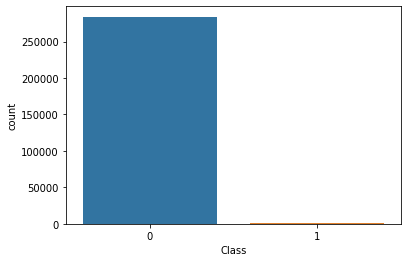

In [ ]:
sns.countplot(train.Class)

# Outliers

since i have 2 lakhs data points i am droping if two columns have outliers

In [ ]:
def outliers(df,n):
    outlier_indices = []
    # iterate over features(columns)
    for col in df.columns.difference(['Class']):
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)  
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   
Outliers_to_drop = outliers(train,1)

In [ ]:
len(Outliers_to_drop)

81334

In [ ]:
df_Outlies=train.loc[Outliers_to_drop]

In [ ]:
df_Outlies

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
25,25,-0.177627,-1.450960,1.599820,-0.597122,-1.975050,0.908327,-0.420661,0.462806,-0.000240,0.036885,0.805719,0.138704,-0.691732,-0.982953,-1.803169,0.534180,0.874261,-1.147392,0.721787,0.519968,0.421398,0.992138,0.689745,0.228899,-0.500738,-0.266360,-0.023831,-0.050647,250.00,0
81,81,-1.205141,-0.089466,-0.794670,-2.625725,1.421087,-0.758064,0.743424,-1.140429,0.635770,-1.258292,0.323474,0.906078,-0.395380,0.610071,-0.711825,-0.925986,-0.341918,0.207223,1.429707,-0.594630,0.764861,-0.020798,-1.479669,0.332991,0.085645,-0.210479,0.264612,0.106741,199.00,0
83,83,-1.523300,-1.006176,0.852255,-2.111275,-1.986956,-0.296121,0.931744,0.210910,-3.134375,0.218257,0.860631,-0.075286,0.570839,-0.013886,-1.737159,-0.516097,0.605510,0.337325,-0.324387,0.396275,0.173885,0.095830,0.523786,0.500744,0.817530,-0.189276,-0.215964,-0.017130,370.30,0
96,96,-2.389340,-0.253325,-1.163972,0.576280,1.942638,3.880275,0.265654,1.018780,-0.201364,0.208343,-0.653555,0.035292,-0.003613,0.243711,0.319322,-0.325533,-0.079168,0.190665,1.547045,-0.503952,-0.263582,-0.164231,-0.086684,1.070140,0.191235,-0.258653,0.017152,0.196985,199.00,0
109,109,-0.841021,-2.968521,-1.080914,2.046657,-0.951907,-0.182914,1.729186,-0.430582,-0.361283,-0.466805,-0.119006,0.432903,0.366200,0.693069,1.097926,-0.202780,-0.076339,-0.573011,-1.035023,1.993207,0.642750,-0.475548,-0.999616,0.142254,0.267147,-0.426756,-0.180578,0.198806,1065.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262292,262292,-1.650699,-0.502441,-1.099444,-1.137406,2.310900,-0.851110,2.268150,-1.098775,0.387248,1.040539,0.752673,-0.046212,-0.536936,0.035612,-0.433428,-0.497270,-1.193281,0.109266,0.428797,-0.541544,-0.183133,1.099293,0.593657,0.274448,-0.044576,0.016414,-0.141800,-0.231665,77.87,0
130427,130427,-0.119290,-0.072673,0.954166,-1.748743,-0.629337,-0.262410,-0.107887,-1.046362,-2.774309,1.689599,1.432664,-0.926072,-0.695110,0.156265,0.015220,-1.336662,1.014354,0.085497,0.527959,-0.411975,0.741758,0.253105,-0.015319,0.201732,-0.428462,-0.108378,0.046545,-0.084813,20.00,0
179605,179605,-1.866509,1.579463,-2.460731,-3.014542,-1.153790,-1.995848,-0.565265,1.174471,-2.747552,1.109428,-1.714561,-0.387278,0.910981,1.032252,-1.241901,-0.451337,0.833070,-0.182511,-0.927294,-0.396580,0.150038,0.666652,0.006923,-0.099619,-0.052937,-0.124371,0.235901,0.187640,7.00,0
228488,228488,-1.678453,0.274829,1.187605,-2.651908,-1.442267,0.300539,-1.285997,1.263076,-2.586375,0.799995,1.081559,-0.260269,0.032713,0.270147,-0.042083,-0.268440,0.865004,0.068070,-1.420356,-0.341504,0.142903,0.670956,-0.206514,-0.296561,0.431501,-0.046219,0.198932,0.019337,18.42,0


In [ ]:
df_Outlies=df_Outlies[df_Outlies['Class'] !=0]

In [ ]:
train.shape

(284455, 31)

In [ ]:
train=train.drop(Outliers_to_drop,axis=0)

In [ ]:
train.shape

(203121, 31)

In [ ]:
train = pd.concat([train, df_Outlies])

In [ ]:
train.Class.value_counts()

0    203098
1       440
Name: Class, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


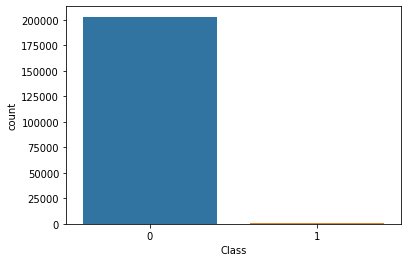

In [ ]:
sns.countplot(train.Class)

In [ ]:
train.head(3)

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,1.607283,-0.780267,-0.294928,1.236719,-0.135565,-0.832677,-1.400205,0.807960,-0.670317,-0.044106,-0.292081,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75,0
1,1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,0.188511,0.674525,0.712608,0.122319,1.038024,0.128638,-0.222614,-0.687546,-0.056504,-0.040015,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0
2,2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,-0.033777,-0.001594,1.767471,-1.212943,0.427684,1.252714,0.843412,-1.534474,0.830734,0.207653,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0


In [ ]:
test.head(3)

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,1.755477,-0.860198,-1.629185,0.164162,0.027778,-0.330613,0.216770,-0.215280,1.187584,-0.291611,-1.883296,0.107464,-0.180398,0.138906,-0.105876,-0.229330,-0.401810,-0.330877,0.620971,0.135129,-0.122173,-0.503867,-0.063954,-1.047319,-0.016514,-0.039022,-0.058861,-0.035955,186.76
1,1,-0.706506,1.155627,1.132585,2.742101,1.203095,0.013641,1.200743,-0.273633,-1.323403,1.138185,-1.275816,-1.087457,-0.936612,-0.041733,-1.153523,0.551025,-0.829644,-0.069660,-1.874384,-0.281283,0.352723,1.142657,-0.156382,1.139391,-0.151635,0.063306,-0.284146,-0.015198,21.18
2,2,1.043717,-0.928666,0.643312,-2.093695,-0.527878,1.420413,-1.053914,0.702897,2.450726,-1.767777,2.057099,2.184425,-0.470463,-0.016315,1.027377,-2.374469,1.332018,-1.536175,0.206623,-0.264045,0.008873,0.568767,0.070359,-0.978165,0.258814,-0.726163,0.176843,0.005530,1.00


# Downsampling

In [ ]:
train.Class.value_counts()

0    203098
1       440
Name: Class, dtype: int64

In [ ]:
from sklearn.utils import resample
df_0 = train[train.Class==0]
df_1 = train[train.Class!=0]
df_0.shape

(203098, 31)

In [ ]:
downsampled_data = resample(df_0,replace=False,n_samples=100000,random_state=43) 

In [ ]:
downsampled_data.shape

(100000, 31)

In [ ]:
downsampled_data.Class.value_counts()

0    100000
Name: Class, dtype: int64

In [ ]:
train = pd.concat([downsampled_data, df_1])

In [ ]:
train.Class.value_counts()

0    100000
1       440
Name: Class, dtype: int64

In [ ]:
test.sample(3)

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
151,151,-0.064873,0.832648,1.046668,0.330561,-0.592660,-0.130957,-0.989111,-2.583426,-0.401794,-0.909335,-0.026647,0.032216,-1.277009,0.960289,1.249385,0.152978,0.165568,-0.89481,-0.832616,0.475609,-1.497077,-0.382222,0.170202,0.348060,0.558996,0.162675,-0.013679,0.160925,1.98
232,232,-0.844413,1.032424,1.090921,-0.671593,-0.006061,-0.621923,0.322604,0.513167,-0.705964,-0.772808,0.588264,0.327030,-0.758512,0.787325,-0.351766,0.965794,-0.888045,0.29974,-0.403316,-0.289995,-0.080023,-0.535090,0.005324,-0.042269,-0.453002,-0.127804,-0.057711,0.053107,0.89
101,101,1.749337,-0.042090,-1.264897,1.599368,0.041292,-0.803430,0.219798,-0.249512,0.470616,-0.375604,-0.449722,0.571059,0.805131,-1.203540,0.261584,0.354316,0.411209,0.20665,-0.691719,0.051072,0.006782,-0.008180,0.052337,-0.192411,-0.030767,-0.705666,0.033197,0.009011,121.00


# Data Cleaning

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100440 entries, 77148 to 163807
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Index   100440 non-null  int64  
 1   V1      100440 non-null  float64
 2   V2      100440 non-null  float64
 3   V3      100440 non-null  float64
 4   V4      100440 non-null  float64
 5   V5      100440 non-null  float64
 6   V6      100440 non-null  float64
 7   V7      100440 non-null  float64
 8   V8      100440 non-null  float64
 9   V9      100440 non-null  float64
 10  V10     100440 non-null  float64
 11  V11     100440 non-null  float64
 12  V12     100440 non-null  float64
 13  V13     100440 non-null  float64
 14  V14     100440 non-null  float64
 15  V15     100440 non-null  float64
 16  V16     100440 non-null  float64
 17  V17     100440 non-null  float64
 18  V18     100440 non-null  float64
 19  V19     100440 non-null  float64
 20  V20     100440 non-null  float64
 21  V21   

In [ ]:
train.describe()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000,100440.000000
mean,141962.516129,0.528309,0.055852,0.130805,0.008317,-0.097448,-0.221400,-0.028352,0.070658,-0.063649,-0.050512,-0.000446,0.067130,-0.033820,-0.023466,0.013243,0.024701,-0.106555,-0.045965,0.029712,-0.057401,-0.025405,-0.018493,-0.003187,-0.002858,0.014814,-0.003629,0.015328,0.012002,46.886666,0.004381
std,82180.400548,1.370670,0.914351,1.388730,1.243626,0.952430,0.921365,0.935925,0.586361,0.962987,0.865140,1.028603,0.962713,0.977954,0.860869,0.865699,0.839812,0.866944,0.796822,0.707187,0.243854,0.362928,0.674232,0.237197,0.563565,0.445918,0.458024,0.177065,0.101215,68.720074,0.066042
min,1.000000,-30.552380,-8.402154,-31.103685,-4.407282,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-2.988333,-18.683715,-4.008640,-19.214325,-4.498945,-13.563273,-25.162799,-9.335193,-4.223961,-4.128186,-22.797604,-8.887017,-19.254328,-2.775670,-4.781606,-1.524304,-7.263482,-1.869290,0.000000,0.000000
25%,70570.250000,-0.570151,-0.513762,-0.695803,-0.767646,-0.668513,-0.787004,-0.517950,-0.172105,-0.619186,-0.469601,-0.784844,-0.325926,-0.698885,-0.386550,-0.549603,-0.404668,-0.509585,-0.515499,-0.378518,-0.198550,-0.222113,-0.558826,-0.136390,-0.343463,-0.295968,-0.315950,-0.054910,-0.044034,5.000000,0.000000
50%,141840.500000,1.050045,0.039528,0.272938,0.039479,-0.105594,-0.366461,0.032122,0.016004,-0.064920,-0.088183,-0.033343,0.191555,-0.022146,0.035404,0.056556,0.088991,-0.124575,-0.048408,0.035095,-0.076185,-0.040206,-0.020692,-0.008832,0.036164,0.028836,-0.045707,0.003201,0.010787,19.900000,0.000000
75%,213372.250000,1.699891,0.682314,1.060554,0.699407,0.452089,0.148329,0.500486,0.249857,0.520247,0.351957,0.749519,0.640406,0.650126,0.421967,0.643534,0.506076,0.301903,0.429433,0.444207,0.073684,0.154993,0.488105,0.126922,0.407089,0.347089,0.213745,0.070518,0.054011,59.990000,0.000000
max,284452.000000,2.430507,22.057729,3.867647,12.114672,11.095089,6.474115,5.431271,20.007208,4.608729,4.031435,12.018913,2.218439,4.569009,3.442422,3.032448,3.139656,6.739384,3.790316,4.199153,11.059004,27.202839,8.361985,5.466230,4.014444,2.208209,3.118588,3.052358,1.779364,2125.870000,1.000000


In [ ]:
for i in train:
  print("number of null values :",i,train[i].isnull().any() + train[i].isna().sum())

number of null values : Index 0
number of null values : V1 0
number of null values : V2 0
number of null values : V3 0
number of null values : V4 0
number of null values : V5 0
number of null values : V6 0
number of null values : V7 0
number of null values : V8 0
number of null values : V9 0
number of null values : V10 0
number of null values : V11 0
number of null values : V12 0
number of null values : V13 0
number of null values : V14 0
number of null values : V15 0
number of null values : V16 0
number of null values : V17 0
number of null values : V18 0
number of null values : V19 0
number of null values : V20 0
number of null values : V21 0
number of null values : V22 0
number of null values : V23 0
number of null values : V24 0
number of null values : V25 0
number of null values : V26 0
number of null values : V27 0
number of null values : V28 0
number of null values : Amount 0
number of null values : Class 0


In [ ]:
train.dtypes

Index       int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
test.sample()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
235,235,0.605121,2.137795,-0.584328,4.806012,1.926058,0.440298,1.010309,-0.476624,-0.05042,1.069576,0.119231,-3.865152,2.114368,-1.685091,0.035085,0.666458,2.505683,1.237031,0.85726,0.5719,-0.750998,-1.243716,-0.009157,-1.416247,-0.606659,0.024835,0.064254,-0.312506,4.32


# Feature Analysis

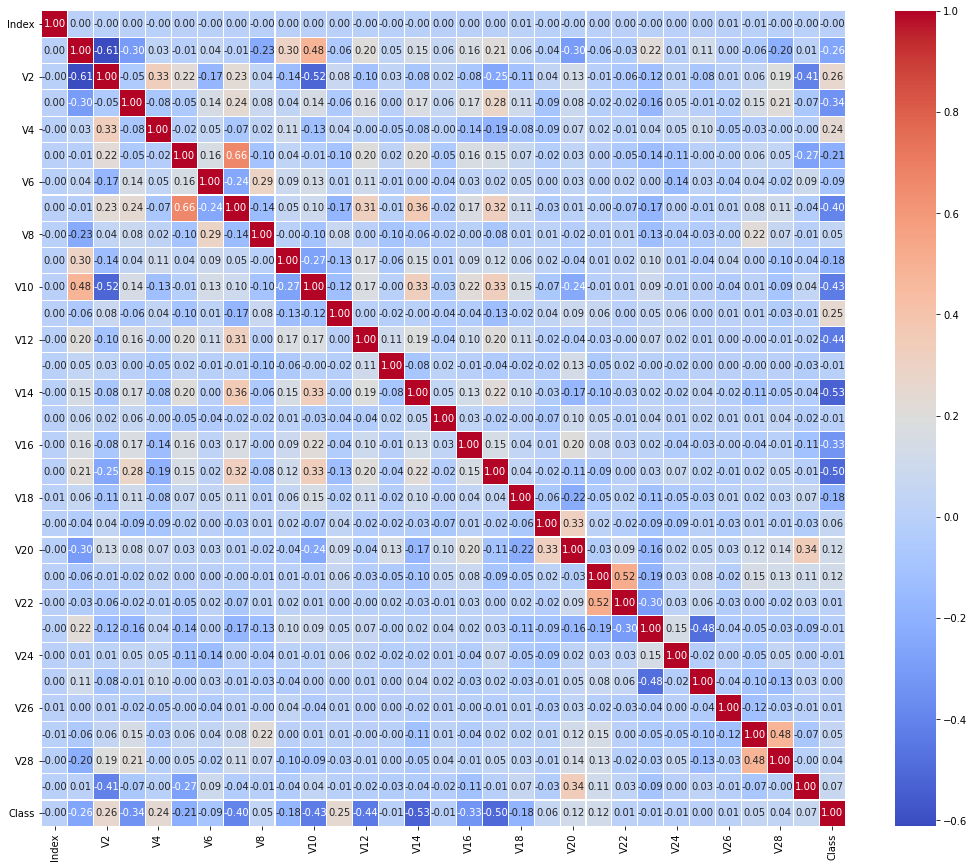

In [ ]:
sns.heatmap(train.corr(),annot=True, fmt = ".2f", cmap = "coolwarm",linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(18,15)

In [ ]:
train.columns

Index(['Index', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


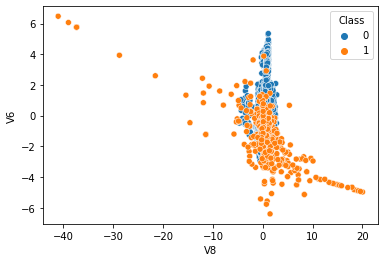

In [ ]:
sns.scatterplot('V8','V6',data=train,hue="Class")

In [ ]:
#ns.stripplot('V7','V2',data=train,hue="Class")

In [ ]:
#sns.displot('V21','V22',data=train,hue="Class")

In [ ]:
#sns.violinplot('V21','V22',data=train,hue="Class")

In [ ]:
#sns.catplot(x='V27',y='V28',data=train,hue="Class")

# Train_Test_Split

In [ ]:
print(train.shape)
print(test.shape)

(100440, 31)
(352, 30)


In [ ]:
X=train.drop("Class",inplace=False,axis=1)
y=train.Class

In [ ]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67294, 30)
(33146, 30)
(67294,)
(33146,)


In [ ]:
test.sample()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
173,173,0.288029,0.965681,-1.459495,1.921863,-1.912414,-1.130282,-2.814263,0.648663,-0.695263,-3.465689,2.351619,-3.826705,-0.76757,-4.852867,1.664863,-2.617361,-4.835558,-1.921752,-0.385884,0.330917,0.603127,0.38069,-0.064125,0.27138,0.33722,0.626156,0.565125,0.305925,23.36


# Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [ ]:
test.sample(5)

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
22,22,-0.085720,-0.336401,1.063106,-1.989851,-0.420500,-0.702486,0.180025,-0.071758,-0.612337,-0.303581,-1.128847,-0.358226,0.490237,-0.800098,-1.214640,1.200828,-0.008127,-1.800974,0.195507,0.115676,-0.150736,-0.577610,0.184696,-0.152854,-0.136151,-0.657096,-0.043659,-0.040738,59.02
266,266,1.114285,-0.127943,0.995079,1.012772,-0.374225,0.996565,-0.734055,0.403424,0.628966,-0.085306,0.566510,1.191580,0.355400,-0.236744,-0.253327,0.168326,-0.488067,0.171041,-0.023177,-0.111515,-0.024446,0.151502,-0.076415,-0.649627,0.414002,-0.355421,0.086117,0.018537,9.99
197,197,-0.173662,-0.644558,-1.395550,-3.211348,0.569052,4.069810,-0.940384,1.214127,-1.960372,0.981047,-0.551452,-0.956995,0.374235,-0.206532,0.126003,-0.526494,0.526413,0.110480,-0.075555,-0.516837,-0.006844,0.298987,0.276928,0.689326,-0.856678,-0.225737,-0.108292,-0.002892,138.00
126,126,1.999852,-1.128660,0.209440,-0.530183,-1.227929,0.694198,-1.506686,0.324265,3.605142,-1.198039,-2.520906,1.043896,0.311991,-1.305258,-0.852452,-0.705335,-0.169727,0.638872,1.209236,-0.224268,0.066095,0.921168,-0.053583,-0.948984,0.153628,-0.752294,0.167795,-0.030466,0.02
289,289,-3.309490,0.601716,0.515406,-0.824929,0.220141,1.244638,-4.946696,-7.274417,-1.779976,-0.915022,-0.301775,0.358775,-1.690556,1.523561,-0.233920,-0.379582,0.084613,1.960585,-0.401453,1.000108,-4.478904,-0.461893,-1.211384,0.313232,-0.581804,0.004741,-0.228416,-0.170201,41.96


In [ ]:
test =pd.DataFrame(scaler.transform(test))

In [ ]:
test.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
93,-1.722673,-0.940454,1.152877,0.313577,-0.340299,-0.094853,-0.140425,0.237134,0.246759,0.798549,-0.023912,1.052423,0.155543,-0.556481,-1.695911,-0.311773,0.988353,0.284121,1.558424,-0.949509,1.156818,0.523621,1.226371,-0.945316,-0.095809,0.146686,1.025918,1.711553,1.677138,-0.318695
145,-1.722041,-0.501949,-1.305137,1.612388,-1.676476,-1.617695,1.251069,-0.648455,-0.357146,-1.299657,1.885602,0.290751,-1.345129,-0.010018,-1.392776,0.324367,-0.232530,0.110966,1.984783,1.180808,0.011897,0.213707,1.470044,-0.633111,-0.832238,-1.284835,0.117270,-1.204582,-3.278233,0.958103
252,-1.720740,0.544242,-0.725634,-0.048563,-0.573128,-0.547049,-0.105747,-0.310278,-0.340889,-0.954539,0.728191,-0.551446,0.093552,1.078486,0.044818,1.236801,-1.722177,0.166338,0.484876,-1.254729,-1.107006,-1.383755,-1.755835,0.428813,-0.723333,0.087237,1.913908,-0.373323,0.020040,0.286886
293,-1.720242,-1.422490,0.515949,1.500891,0.182012,-0.609165,0.386067,-0.469296,1.283467,0.337714,-0.939444,-0.911304,-0.214904,-0.867318,0.030976,0.432653,-0.156549,0.577202,-0.373555,-0.305761,0.536367,0.095964,0.031197,-0.483058,0.148110,0.313690,0.886184,0.950041,0.082393,-0.295181
1,-1.723792,-0.902193,1.206889,0.720517,2.200124,1.374745,0.257907,1.305015,-0.564597,-1.309001,1.372584,-1.236528,-1.205899,-0.918349,-0.023622,-1.345569,0.627276,-0.842833,-0.027458,-2.687475,-0.904868,0.991349,1.718107,-0.650695,2.022997,-0.373378,0.152428,-1.679440,-0.264871,-0.373656


In [ ]:
clf=LogisticRegression(C=10,n_jobs=4)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.999569055190656
0.9995474567066917
[[32985     2]
 [   13   146]]


In [ ]:
clf.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


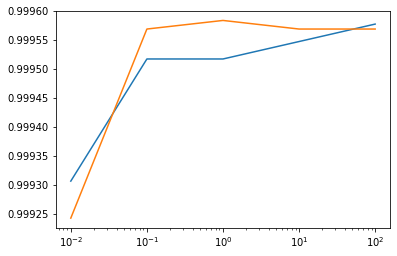

In [ ]:
c=[0.01,0.1,1,10,100]
test_Score=[]
train_Score=[]
for i in c :
  clf=LogisticRegression(C=i)
  clf.fit(X_train,y_train)
  train_Score.append(clf.score(X_train,y_train))
  test_Score.append(clf.score(X_test,y_test))
plt.plot(c,test_Score,label="test Score")
plt.plot(c,train_Score,label="train Score")
plt.xscale('log')

In [ ]:
clf=SVC()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.9996582161856926
0.9995776262595788
[[32986     1]
 [   13   146]]


In [ ]:
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred=clf.predict(test)

In [ ]:
pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
result = pd.DataFrame({'index':range(0,len(test)),'class':pred})
result

,index,class
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
347,347,1
348,348,0
349,349,0
350,350,0


In [ ]:
result['class'].value_counts()

0    284
1     68
Name: class, dtype: int64

In [ ]:
result = result.to_csv('/content/gdrive/My Drive/SKILLATHON (DATA SCIENCE)/data/result1.csv', index = True) 

In [ ]:
clf=GaussianNB()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.9988557672303623
0.9985820310143003
[[32954    33]
 [   14   145]]


In [ ]:
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

1.0
0.9991854220720449
[[32975    12]
 [   15   144]]


In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf=RandomForestClassifier(n_jobs=4)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

1.0
0.9994871176009171
[[32986     1]
 [   16   143]]


In [ ]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
clf=AdaBoostClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.9994947543614586
0.9993664393893682
[[32983     4]
 [   17   142]]


In [ ]:
clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
clf=GradientBoostingClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

1.0
0.9990044047547215
[[32971    16]
 [   17   142]]


In [ ]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
from xgboost import XGBClassifier
clf=XGBClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.9996582161856926
0.9994267784951427
[[32984     3]
 [   16   143]]


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
kfold = StratifiedKFold(n_splits=3)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


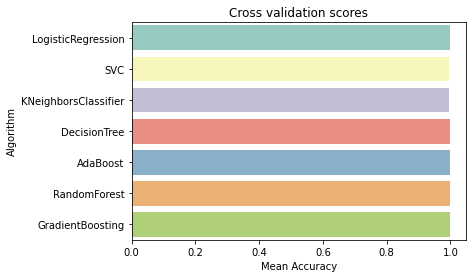

In [ ]:
random_state = 2
classifiers = []
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(KNeighborsClassifier(n_neighbors=3))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X, y = y, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","SVC","KNeighborsClassifier","DecisionTree","AdaBoost",
"RandomForest","GradientBoosting"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
